In [1]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv('C:/Users/user/Downloads/courses.csv')

In [5]:
# 1

In [8]:
df.duration[1]

'65.5 total hours'

In [9]:
df['duration'].map(lambda x:len(x)).value_counts()

duration
13    32233
15    29700
12    11922
14     4838
16     4322
11       42
17       36
1        11
Name: count, dtype: int64

In [10]:
df[df['duration'].map(lambda x:len(x))==11]['duration'].head()

23031    3 questions
23654    4 questions
24382    4 questions
24451    7 questions
24499    3 questions
Name: duration, dtype: object

In [11]:
df['duration']=df['duration'].map(lambda x:x.replace(' questions',''))

In [12]:
df['duration'].map(lambda x:len(x)).value_counts()

duration
13    30617
15    29700
12    11416
14     4790
16     4322
3      1616
2       506
1        53
4        48
17       36
Name: count, dtype: int64

In [13]:
df[df['duration'].map(lambda x:len(x))==14]['duration'][0]

'22 total hours'

In [14]:
df['duration']=df['duration'].map(lambda x:x.replace(' total hours',''))

In [15]:
df['duration'].map(lambda x:len(x)).value_counts()

duration
3     31316
1     24604
12    11416
13     6066
2      5296
4      4370
5        36
Name: count, dtype: int64

In [16]:
df[df['duration'].map(lambda x:len(x))==12]['duration'].iloc[0]

'1 total hour'

In [18]:
df['duration']=df['duration'].map(lambda x:x.replace(' total hour',''))

In [22]:
df['duration'].map(lambda x:len(x)).value_counts()

duration
1     36020
3     31316
13     6066
2      5296
4      4370
5        36
Name: count, dtype: int64

In [24]:
df[df['duration'].map(lambda x:len(x))==13]['duration'].iloc[0]

'43 total mins'

In [27]:
df['duration']=df['duration'].map(lambda x:x.replace(' total mins',''))

In [29]:
df['duration'].map(lambda x:len(x)).value_counts()

duration
1    36020
3    31316
2    11362
4     4370
5       36
Name: count, dtype: int64

In [32]:
# FLOAT FORMATIGA O'TKAZISH

In [34]:
df['duration']=df['duration'].map(lambda x:float(x))

In [35]:
df['duration']

0        22.0
1        65.5
2        64.0
3        34.5
4        64.0
         ... 
83099     1.0
83100     1.5
83101    39.0
83102     1.5
83103    31.0
Name: duration, Length: 83104, dtype: float64

In [36]:
df['duration'].map(lambda x:type(x)).value_counts()

duration
<class 'float'>    83104
Name: count, dtype: int64

In [38]:
# Kurslarning o‘rtacha davomiyligini aniqlang.har bir kurs uchun

In [40]:
df.groupby('title').duration.agg(np.mean)

C:\Users\user\AppData\Local\Temp\ipykernel_14636\1985199114.py:1: FutureWarning: The provided callable <function mean at 0x000001DFAA4B4360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('title').duration.agg(np.mean)


title
! Risk Management in Projects, Programs and Portfolios          14.5
"Anatomy of Yoga" 1: Teacher Training Workshop Series           10.0
"Anatomy of Yoga" 2: Teacher Training Workshop Series           10.5
"Anatomy of Yoga"3: Teacher Training Workshop Series            13.0
"Aprenda SPED na prática"                                        8.5
                                                                ... 
３時間で学ぶ！本気でExcelマクロ(VBA)を学びたい人のための基礎講座【ファイル作成編】                   3.0
４０代以上のビジネスパーソンのための食事学  疲れない身体をつくるセルフコンディショニング術                   1.5
５０００年前から続く腸活＂朝の６４０ｃｃ飲水＂　カラダ内洗浄                                  32.0
６時間でインターバンク市場を攻略！最短距離でトレード基礎力                                    4.0
９９％の人が知らない[慢性疲労克服マニュアル] 副腎ケアで疲れ知らずのカラダを手に入れて人生をバージョンアップさせよう！     3.0
Name: duration, Length: 82798, dtype: float64

In [43]:
# barcha kurslar uchun

In [53]:
df.duration.mean()

13.607515883711976

In [57]:
# Eng yuqori reytingli va eng ko‘p sharhga ega bo‘lgan kursni toping

In [59]:
df['rating'].max()

5.0000005

In [61]:
df['num_reviews'].max()

452973

In [63]:
df.to_csv('courses.csv',index=False)

In [65]:
# SQL

In [66]:
import psycopg2 as psql

In [67]:
ula=psql.connect(host='localhost',
                 database='postgres',
                 user='postgres',
                 password=74123)

In [68]:
cursor=ula.cursor()

In [69]:
cursor.execute('select * from car;')

In [70]:
cursor.fetchone()

(1, 'Chevrolet', 'G-Series G30', Decimal('1995'), Decimal('56733.89'))

In [74]:
cursor.execute("create table course (id int,title text,url text,rating text,num_reviews numeric(10),num_published_lectures numeric(5),created timestamp,last_update_date timestamp,duration numeric(5,2),instructors_id numeric(10),image text);")

DuplicateTable: ОШИБКА:  отношение "course" уже существует


In [ ]:
with open('C:/Users/user/Downloads/courses2.xls','r') as f:
    next(f)
    cursor.copy_from(f,'course',sep=',')


In [ ]:
cursor.execute('/copy')
cursor.fetchall()

In [ ]:
df.head(7)

In [ ]:
type(df.id[0])

In [ ]:
df.id[0]

In [93]:
df.head()

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22.0,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64.0,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64.0,31334738,https://img-c.udemycdn.com/course/750x422/2776...


In [81]:
# MATPLOTLIB SEABORN

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

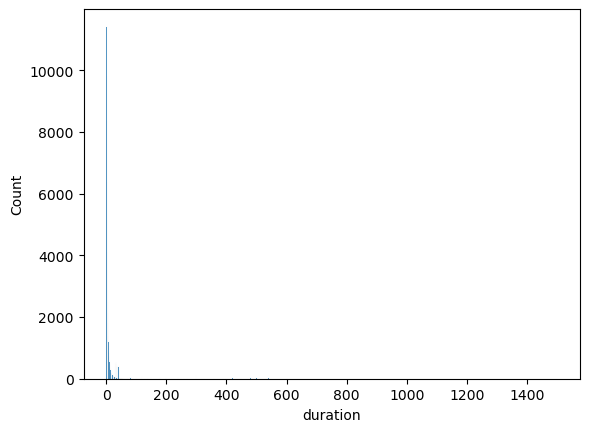

In [84]:
sns.histplot(data=df,x='duration')
plt.show()

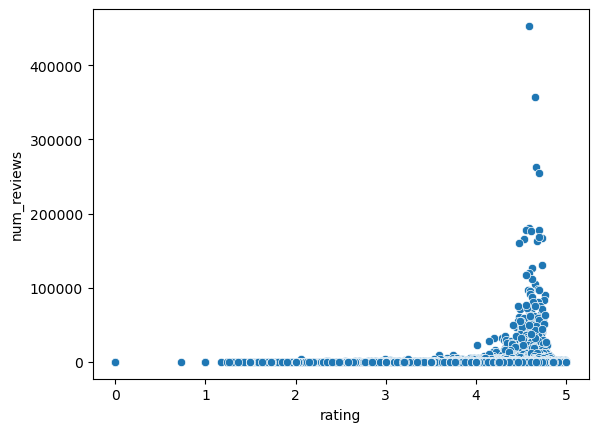

In [85]:
sns.scatterplot(data=df,x='rating',y='num_reviews')
plt.show()

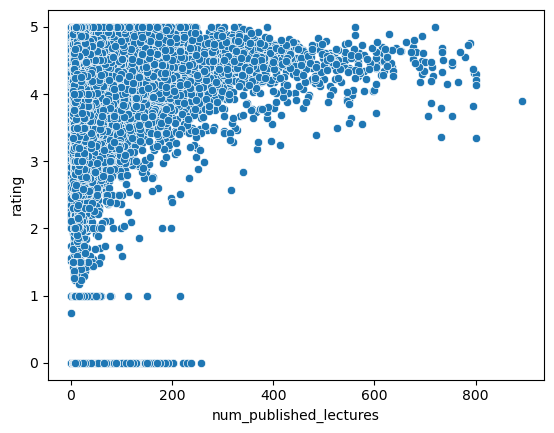

In [91]:
sns.scatterplot(data=df,x='num_published_lectures',y='rating')
plt.show()

In [97]:
type(df.last_update_date)

pandas.core.series.Series

In [117]:
import datetime as dt

In [127]:
df['last_update_date'] = pd.to_datetime(df['last_update_date'],format='%Y-%m-%d')

In [129]:
df

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22.0,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64.0,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64.0,31334738,https://img-c.udemycdn.com/course/750x422/2776...
...,...,...,...,...,...,...,...,...,...,...,...
83099,5029000,Was sind Subliminales und wie stelle ich sie h...,/course/was-sind-subliminales-und-wie-stelle-i...,1.500000,1,5,2022-12-17T12:25:46Z,2022-12-28,1.0,129402400,https://img-b.udemycdn.com/course/750x422/5029...
83100,4694354,Introduction au Piano populaire (avec symboles...,/course/arrangement-pour-piano-i-les-technique...,0.000000,0,28,2022-05-19T15:10:45Z,2022-08-25,1.5,66960110,https://img-b.udemycdn.com/course/750x422/4694...
83101,4668986,あい先生のピアノレッスン 親子で学ぶピアノ準備編,/course/aipiano004/,0.000000,0,24,2022-05-02T13:43:00Z,2022-07-13,39.0,130073700,https://img-b.udemycdn.com/course/750x422/4668...
83102,4954150,Spielerisch Gitarre Spielen Lernen Für Anfänger,/course/spielerisch-gitarre-spielen-lernen-fur...,0.000000,0,13,2022-10-31T06:54:15Z,2022-11-28,1.5,95626112,https://img-b.udemycdn.com/course/750x422/4954...


In [131]:
df['update_year']=df.last_update_date.dt.year

In [133]:
df

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,update_year
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22.0,9685726,https://img-c.udemycdn.com/course/750x422/5678...,2021.0
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5,31334738,https://img-c.udemycdn.com/course/750x422/1565...,2023.0
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64.0,4466306,https://img-c.udemycdn.com/course/750x422/6252...,2023.0
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5,13952972,https://img-c.udemycdn.com/course/750x422/7561...,2023.0
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64.0,31334738,https://img-c.udemycdn.com/course/750x422/2776...,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...
83099,5029000,Was sind Subliminales und wie stelle ich sie h...,/course/was-sind-subliminales-und-wie-stelle-i...,1.500000,1,5,2022-12-17T12:25:46Z,2022-12-28,1.0,129402400,https://img-b.udemycdn.com/course/750x422/5029...,2022.0
83100,4694354,Introduction au Piano populaire (avec symboles...,/course/arrangement-pour-piano-i-les-technique...,0.000000,0,28,2022-05-19T15:10:45Z,2022-08-25,1.5,66960110,https://img-b.udemycdn.com/course/750x422/4694...,2022.0
83101,4668986,あい先生のピアノレッスン 親子で学ぶピアノ準備編,/course/aipiano004/,0.000000,0,24,2022-05-02T13:43:00Z,2022-07-13,39.0,130073700,https://img-b.udemycdn.com/course/750x422/4668...,2022.0
83102,4954150,Spielerisch Gitarre Spielen Lernen Für Anfänger,/course/spielerisch-gitarre-spielen-lernen-fur...,0.000000,0,13,2022-10-31T06:54:15Z,2022-11-28,1.5,95626112,https://img-b.udemycdn.com/course/750x422/4954...,2022.0


In [161]:
a=df.groupby('update_year').size()

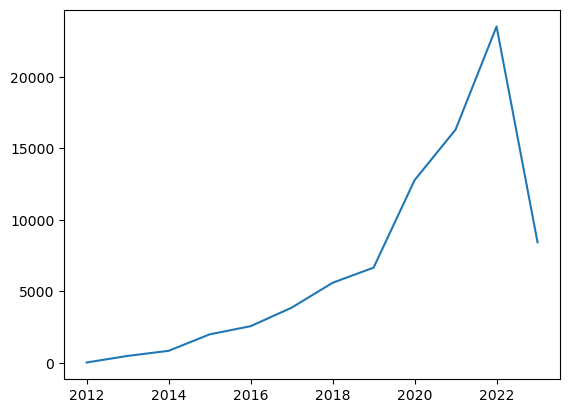

In [163]:
plt.plot(a.index, a.values, linestyle='-')
plt.show()